## Practice: Fun with Word Embeddings (4 points total)

Today we gonna play with word embeddings: train our own little embeddings, load one from the gensim model zoo and use it to visualize text corpora.

This whole thing is gonna happen on top of an embedding dataset.

__Requirements:__  `pip install --upgrade nltk gensim bokeh`, but only if you're running locally.

**Please submit this notebook as part of your homework!**

In [9]:
# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt
# alternative download link: https://yadi.sk/i/BPQrUu1NaTduEw

--2025-10-27 19:55:49--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/p0t2dw6oqs6oxpd6zz534/quora.txt?rlkey=bjupppwua4zmd4elz8octecy9&dl=1 [following]
--2025-10-27 19:55:49--  https://www.dropbox.com/scl/fi/p0t2dw6oqs6oxpd6zz534/quora.txt?rlkey=bjupppwua4zmd4elz8octecy9&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6274baa463bb28211cbcd13312.dl.dropboxusercontent.com/cd/0/inline/C0DaU_LKJiTIvg0ChI2OHpgk_opWvCu1eCEmtVy-97fjdwiFqWhCnD_BoqFrHzcY7T-u1Yd4VlioAa31wqRfrh_bR58QmmZVo3e1PkAqfdw44C3pXV8mMybkdOoeSb-_AUs/file?dl=1# [following]
--2025-10-27 19:55:50--  https://uc6274baa463bb28211cbcd13312.dl.dropboxusercontent.com/cd/0/inline/C0DaU_LK

In [10]:
import numpy as np

with open("./quora.txt", encoding="utf-8") as file:
    data = list(file)

data[50]

"What TV shows or books help you read people's body language?\n"

__Tokenization:__ a typical first step for an NLP task is to split raw data into words.
The text we're working with is in raw format: with all the punctuation and emojis attached to some words, so a simple str.split won't do.

Let's use __`nltk`__ - a library that handles many NLP tasks like tokenization, stemming, or part-of-speech tagging.

In [11]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

print(tokenizer.tokenize(data[50]))

['What', 'TV', 'shows', 'or', 'books', 'help', 'you', 'read', 'people', "'", 's', 'body', 'language', '?']


In [12]:
# TASK: lowercase everything and extract tokens with tokenizer.
# data_tok should be a list of lists of tokens for each line in data.

data_tok = []
for line in data:
    # Lowercase the line and tokenize it
    tokens = tokenizer.tokenize(line.lower())
    data_tok.append(tokens)

In [5]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
assert all(map(lambda l: not is_latin(l) or l.islower(), map(' '.join, data_tok))), "please make sure to lowercase the data"

In [6]:
print([' '.join(row) for row in data_tok[:2]])

["can i get back with my ex even though she is pregnant with another guy ' s baby ?", 'what are some ways to overcome a fast food addiction ?']


__Word vectors:__ as the saying goes, there's more than one way to train word embeddings. There's Word2Vec and GloVe with different objective functions. Then there's fastText that uses character-level models to train word embeddings.

The choice is huge, so let's start someplace small: __gensim__ is another NLP library that features many vector-based models including word2vec.

In [7]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 65.3 MB/s eta 0:00:00


In [8]:
from gensim.models import Word2Vec
model = Word2Vec(data_tok,
                 vector_size=32,
                 min_count=5,
                 window=5).wv

In [13]:
# now you can get word vectors !
model.get_vector('anything')

array([-1.3904071 ,  1.1309313 , -0.27797294,  1.8645663 ,  1.6100595 ,
        2.656095  ,  1.0049585 , -3.167122  ,  0.65716326,  4.5597253 ,
       -1.561961  ,  2.6511724 ,  4.692369  ,  1.3161653 ,  2.927006  ,
       -0.96716845, -0.33804578, -1.5347837 ,  1.2829188 , -2.2421682 ,
       -1.0021892 ,  0.21159917, -1.812727  , -2.4647434 , -0.38380182,
       -3.171036  ,  1.9854547 ,  1.0639361 ,  1.3582789 , -0.3146583 ,
       -0.46896693, -0.80034417], dtype=float32)

In [14]:
# or query similar words directly. Go play with it!
model.most_similar('bread')

[('rice', 0.9508833289146423),
 ('sauce', 0.9184069037437439),
 ('cheese', 0.9184035658836365),
 ('corn', 0.916840136051178),
 ('pasta', 0.9160552620887756),
 ('fruit', 0.9151489734649658),
 ('garlic', 0.9095287322998047),
 ('wine', 0.9087437987327576),
 ('chocolate', 0.9057266712188721),
 ('grass', 0.9042068123817444)]

### Using pre-trained model

Took it a while, huh? Now imagine training life-sized (100~300D) word embeddings on gigabytes of text: Wikipedia articles or Twitter posts.

Thankfully, nowadays you can get a pre-trained word embedding model in 2 lines of code (no SMS required, promise).

After being downloaded for the first time (or if you manually delete it), the model is saved in the `~/gensim_data` or `%USER_PATH%/gensim_data` directory. This can be checked by setting the return_path parameter to True.

In [15]:
import gensim.downloader as api
model = api.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


In [16]:
model.most_similar(positive=["coder", "money"], negative=["brain"])

[('broker', 0.5820155739784241),
 ('bonuses', 0.5424473881721497),
 ('banker', 0.5385112762451172),
 ('designer', 0.5197198390960693),
 ('merchandising', 0.4964233338832855),
 ('treet', 0.4922019839286804),
 ('shopper', 0.4920562207698822),
 ('part-time', 0.4912828207015991),
 ('freelance', 0.4843311905860901),
 ('aupair', 0.4796452820301056)]

```

```

```

```

```

```

```

```


# Visualizing data with word embeddings (1 point)

One way to see if our vectors are any good is to plot them. Thing is, those vectors are in 30D+ space and we humans are more used to 2-3D.

Luckily, we machine learners know about __dimensionality reduction__ methods.

Let's use that to plot 1000 most frequent words

In [17]:
words = model.index_to_key[:1000]

print(words[::100])

['<user>', '_', 'please', 'apa', 'justin', 'text', 'hari', 'playing', 'once', 'sei']


In [18]:
# for each word, compute its vector with model
word_vectors = np.array([model.get_vector(word) for word in words])

In [19]:
assert isinstance(word_vectors, np.ndarray)
assert word_vectors.shape == (len(words), 100)
assert np.isfinite(word_vectors).all()

#### Linear projection: PCA

The simplest linear dimensionality reduction method is **P**rincipal **C**omponent **A**nalysis.

In geometric terms, PCA tries to find axes along which most of the variance occurs. The "natural" axes, if you wish.

<img src="https://github.com/yandexdataschool/Practical_RL/raw/master/yet_another_week/_resource/pca_fish.png" style="width:30%">


Under the hood, it attempts to decompose object-feature matrix $X$ into two smaller matrices: $W$ and $\hat W$ minimizing _mean squared error_:

$$\|(X W) \hat{W} - X\|^2_2 \to_{W, \hat{W}} \min$$
- $X \in \mathbb{R}^{n \times m}$ - object matrix (**centered**);
- $W \in \mathbb{R}^{m \times d}$ - matrix of direct transformation;
- $\hat{W} \in \mathbb{R}^{d \times m}$ - matrix of reverse transformation;
- $n$ samples, $m$ original dimensions and $d$ target dimensions;



In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
word_vectors_pca = scaler.fit_transform(word_vectors_pca)

In [21]:
assert word_vectors_pca.shape == (len(word_vectors), 2), "there must be a 2d vector for each word"
assert max(abs(word_vectors_pca.mean(0))) < 1e-5, "points must be zero-centered"
assert max(abs(1.0 - word_vectors_pca.std(0))) < 1e-2, "points must have unit variance"

#### Let's draw it!

In [22]:
!pip install bokeh

In [23]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource

output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show_plot=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str):
        color = [color] * len(x)

    data_dict = {'x': x, 'y': y, 'color': color}
    for key, value in kwargs.items():
        data_dict[key] = value

    source = ColumnDataSource(data_dict)

    p = figure(width=width, height=height, tools="pan,wheel_zoom,reset,hover")
    p.circle('x', 'y', size=radius, color='color', alpha=alpha, source=source)

    hover = p.select(dict(type=HoverTool))
    hover.tooltips = [(key, "@" + key) for key in kwargs.keys()]

    if show_plot:
        show(p)
    return p

In [24]:
fig = draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

# hover a mouse over there and see if you can identify the clusters

#### Visualizing neighbors with t-SNE
PCA is nice but it's strictly linear and thus only able to capture coarse high-level structure of the data.

If we instead want to focus on keeping neighboring points near, we could use TSNE, which is itself an embedding method. Here you can read __[more on TSNE](https://distill.pub/2016/misread-tsne/)__.

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
word_tsne = tsne.fit_transform(word_vectors)

word_tsne = (word_tsne - word_tsne.mean(axis=0)) / word_tsne.std(axis=0)

In [26]:
draw_vectors(word_tsne[:, 0], word_tsne[:, 1], color='green', token=words)

figure(id='p1045', ...)

### Visualizing phrases

Word embeddings can also be used to represent short phrases. The simplest way is to take __an average__ of vectors for all tokens in the phrase with some weights.

This trick is useful to identify what data are you working with: find if there are any outliers, clusters or other artifacts.

Let's try this new hammer on our data!


In [27]:
def get_phrase_embedding(phrase):
    """
    Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    # 1. lowercase phrase
    # 2. tokenize phrase
    # 3. average word vectors for all words in tokenized phrase
    # skip words that are not in model's vocabulary
    # if all words are missing from vocabulary, return zeros

    vector = np.zeros([model.vector_size], dtype='float32')

    # YOUR CODE
    # Lowercase and tokenize the phrase
    tokens = tokenizer.tokenize(phrase.lower())

    # Collect vectors for tokens that exist in the model's vocabulary
    valid_vectors = []
    for token in tokens:
        if token in model:
            valid_vectors.append(model.get_vector(token))

    # Average the valid vectors
    if valid_vectors:
        vector = np.mean(valid_vectors, axis=0)

    return vector

In [28]:
vector = get_phrase_embedding("I'm very sure. This never happened to me before...")

assert np.allclose(vector[::10],
                   np.array([ 0.31807372, -0.02558171,  0.0933293 , -0.1002182 , -1.0278689 ,
                             -0.16621883,  0.05083408,  0.17989802,  1.3701859 ,  0.08655966],
                              dtype=np.float32))
assert np.array_equal(get_phrase_embedding("thisisgibberish"), np.zeros([model.vector_size], dtype='float32')), "corner case for all missing words should be handled as described in the function comments"

In [29]:
# let's only consider ~5k phrases for a first run.
chosen_phrases = data[::len(data) // 1000]

# compute vectors for chosen phrases
phrase_vectors = np.array([get_phrase_embedding(phrase) for phrase in chosen_phrases])

In [30]:
assert isinstance(phrase_vectors, np.ndarray) and np.isfinite(phrase_vectors).all()
assert phrase_vectors.shape == (len(chosen_phrases), model.vector_size)

In [31]:
# map vectors into 2d space with pca, tsne or your other method of choice
# don't forget to normalize

phrase_vectors_2d = TSNE().fit_transform(phrase_vectors)

phrase_vectors_2d = (phrase_vectors_2d - phrase_vectors_2d.mean(axis=0)) / phrase_vectors_2d.std(axis=0)

In [32]:
draw_vectors(phrase_vectors_2d[:, 0], phrase_vectors_2d[:, 1],
             phrase=[phrase[:50] for phrase in chosen_phrases],
             radius=20,)

figure(id='p1086', ...)

**There's more below! Scroll down when you're ready.**
```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


### Text Classification: Prohibited Comment Classification

![img](https://github.com/yandexdataschool/nlp_course/raw/master/resources/banhammer.jpg)

__In this notebook__ you will build an algorithm that classifies social media comments into normal or toxic.
Like in many real-world cases, you only have a small (10^3) dataset of hand-labeled examples to work with. We'll tackle this problem using both classical nlp methods and embedding-based approach.

In [37]:
# if you're in colab, download the data:
!wget https://raw.githubusercontent.com/yandexdataschool/nlp_course/refs/heads/2025/week01_embeddings/comments.tsv -O ./comments.tsv -q

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("comments.tsv", sep='\t')

texts = data['comment_text'].values
target = data['should_ban'].values
data[50::200]

,should_ban,comment_text
50,0,"""Those who're in advantageous positions are th..."
250,1,Fartsalot56 says f**k you motherclucker!!
450,1,"Are you a fool? \n\nI am sorry, but you seem t..."
650,1,I AM NOT A VANDAL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
850,0,Citing sources\n\nCheck out the Wikipedia:Citi...


In [39]:
from sklearn.model_selection import train_test_split
texts_train, texts_test, y_train, y_test = train_test_split(texts, target, test_size=0.5, random_state=42)

__Note:__ it is generally a good idea to split data into train/test before anything is done to them.

It guards you against possible data leakage in the preprocessing stage. For example, should you decide to select words present in obscene tweets as features, you should only count those words over the training set. Otherwise your algoritm can cheat evaluation.

### Preprocessing and tokenization

Comments contain raw text with punctuation, upper/lowercase letters and even newline symbols.

To simplify all further steps, we'll split text into space-separated tokens using one of nltk tokenizers.

In [40]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

text = 'How to be a grown-up at work: replace "fuck you" with "Ok, great!".'
print("before:", text,)
print("after:", preprocess(text),)

before: How to be a grown-up at work: replace "fuck you" with "Ok, great!".
after: how to be a grown-up at work : replace " fuck you " with " ok , great ! " .


In [41]:
# task: preprocess each comment in train and test

texts_train = [preprocess(text) for text in texts_train]
texts_test = [preprocess(text) for text in texts_test]

In [42]:
assert texts_train[5] ==  'who cares anymore . they attack with impunity .'
assert texts_test[89] == 'hey todds ! quick q ? why are you so gay'
assert len(texts_test) == len(y_test)

### Solving it: bag of words (1 point)

![img](http://www.novuslight.com/uploads/n/BagofWords.jpg)

One traditional approach to such problem is to use bag of words features:
1. build a vocabulary of frequent words (use train data only)
2. for each training sample, count the number of times a word occurs in it (for each word in vocabulary).
3. consider this count a feature for some classifier

__Note:__ in practice, you can compute such features using sklearn. Please don't do that in the current assignment, though.
* `from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer`

In [43]:
# task: find up to k most frequent tokens in texts_train,
# sort them by number of occurrences (highest first)
k = 10000

from collections import Counter

word_counts = Counter()
for text in texts_train:
    words = text.split()
    word_counts.update(words)

most_common_words = word_counts.most_common(k)
bow_vocabulary = [word for word, count in most_common_words]

print('example features:', sorted(bow_vocabulary)[::100])

example features: ['!', '12:20', '300', '_', 'adorned', 'alternative', 'archive', 'average', 'benkner', 'bout', 'came', 'chest', 'combined', 'consumers', 'cricket', 'decisions', 'dickheads', 'domestic', 'eductaion', 'essentially', 'faggot', 'firms', 'frustrated', 'goal', 'hanibal', 'hip-hop', 'identified', 'infoboxes', 'issue', 'kindergarten', 'lets', 'lot', "mclaren's", 'moderator', 'naturally', 'noticeable', 'opposing', 'pdf', 'plant', 'pretoria', 'punctuation', 'rebels', 'repetative', 'riadh', 'schulz', 'shes', 'slit', 'spoof', 'stupid', 't', 'theoretical', 'topic', 'uglyness', 'userspace', 'wanted', 'wikieditor', 'year', '←']


In [44]:
def text_to_bow(text):
    """ convert text string to an array of token counts. Use bow_vocabulary. """
    # Split the text into words
    words = text.split()

    # Create a count vector for the vocabulary
    count_vector = np.zeros(len(bow_vocabulary), dtype='float32')

    # Count occurrences of each vocabulary word
    for word in words:
        if word in bow_vocabulary:
            index = bow_vocabulary.index(word)
            count_vector[index] += 1

    return count_vector

In [45]:
X_train_bow = np.stack(list(map(text_to_bow, texts_train)))
X_test_bow = np.stack(list(map(text_to_bow, texts_test)))

In [46]:
k_max = len(set(' '.join(texts_train).split()))
assert X_train_bow.shape == (len(texts_train), min(k, k_max))
assert X_test_bow.shape == (len(texts_test), min(k, k_max))
assert np.all(X_train_bow[5:10].sum(-1) == np.array([len(s.split()) for s in  texts_train[5:10]]))
assert len(bow_vocabulary) <= min(k, k_max)
assert X_train_bow[6, bow_vocabulary.index('.')] == texts_train[6].split().count('.')

We shall use a simple linear model: __Logistic Regression__.
It might not be the fanciest one around, but the simplicity has its own advantages: a linear model is blazingly fast and needs less data to fit.
Let's sklearn it!

In [47]:
from sklearn.linear_model import LogisticRegression

# Use the successful C value
bow_model = LogisticRegression(C=0.14, random_state=42, max_iter=1000).fit(X_train_bow, y_train)

Model accuracy: 0.772
Well done!


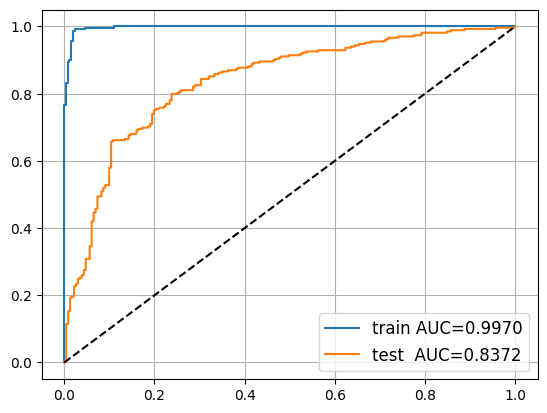

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_bow, y_train, bow_model),
    ('test ', X_test_bow, y_test, bow_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

test_accuracy = np.mean(bow_model.predict(X_test_bow) == y_test)
print(f"Model accuracy: {test_accuracy:.3f}")
assert test_accuracy > 0.77, "Hint: tune the parameter C to improve performance"
print("Well done!")

### Task: implement TF-IDF features (1 point)

Not all words are equally useful. One can prioritize rare words and downscale words like "and"/"or" by using __tf-idf features__. This abbreviation stands for __text frequency/inverse document frequency__ and means exactly that:

$$ \text{feature}_i = \frac{\text{Count}(word_i \in x)}{\text{Total number of words in } x} \times \log\left(\frac{N}{\text{Count}(word_i \in D) + \alpha}\right) $$


, where x is a single text, D is your dataset (a collection of texts), N is a total number of documents and $\alpha$ is a smoothing hyperparameter (typically 1).
And $Count(word_i \in D)$ is the number of documents where $word_i$ appears.

It may also be a good idea to normalize each data sample after computing tf-idf features.

__Your task:__ implement tf-idf features, train a model and evaluate ROC curve. Compare it with basic BagOfWords model from above.

Please don't use sklearn/nltk built-in tf-idf vectorizers in your solution :) You can still use 'em for debugging though.

In [49]:
import numpy as np
from collections import defaultdict

def compute_tfidf_features_improved(texts_train, texts_test, bow_vocabulary, alpha=1.0):
    """
    Improved TF-IDF implementation with proper train/test separation
    """
    vocab_list = list(bow_vocabulary)
    vocab_index = {word: i for i, word in enumerate(vocab_list)}

    N_train = len(texts_train)

    doc_freq = defaultdict(int)
    for text in texts_train:
        words = set(text.split())
        for word in words:
            if word in vocab_index:
                doc_freq[word] += 1

    idf_values = {}
    for word in vocab_list:
        if word in doc_freq and doc_freq[word] > 0:
            idf_values[word] = np.log((N_train + alpha) / (doc_freq[word] + alpha)) + 1
        else:
            idf_values[word] = 1.0

    def compute_document_tfidf(text, normalize=True):
        words = text.split()
        total_words = len(words)
        tfidf_vector = np.zeros(len(vocab_list), dtype='float32')

        if total_words == 0:
            return tfidf_vector

        word_counts = defaultdict(int)
        for word in words:
            word_counts[word] += 1

        for word, count in word_counts.items():
            if word in vocab_index:
                idx = vocab_index[word]
                tf = count / total_words
                idf = idf_values[word]
                tfidf_vector[idx] = tf * idf

        if normalize:
            norm = np.linalg.norm(tfidf_vector)
            if norm > 0:
                tfidf_vector = tfidf_vector / norm

        return tfidf_vector

    X_train_tfidf = np.array([compute_document_tfidf(text) for text in texts_train])
    X_test_tfidf = np.array([compute_document_tfidf(text) for text in texts_test])

    return X_train_tfidf, X_test_tfidf

def compute_tfidf_variations(texts_train, texts_test, bow_vocabulary, variant='standard'):
    """
    Try different TF-IDF variants
    """
    vocab_list = list(bow_vocabulary)
    vocab_index = {word: i for i, word in enumerate(vocab_list)}

    N_train = len(texts_train)

    doc_freq = defaultdict(int)
    for text in texts_train:
        words = set(text.split())
        for word in words:
            if word in vocab_index:
                doc_freq[word] += 1

    def compute_tfidf_document(text, variant='standard'):
        words = text.split()
        total_words = len(words)
        tfidf_vector = np.zeros(len(vocab_list), dtype='float32')

        if total_words == 0:
            return tfidf_vector

        word_counts = defaultdict(int)
        for word in words:
            word_counts[word] += 1

        for word, count in word_counts.items():
            if word in vocab_index:
                idx = vocab_index[word]

                if variant == 'raw':
                    tf = count
                elif variant == 'log':
                    tf = 1 + np.log(count) if count > 0 else 0
                else:
                    tf = count / total_words

                df = doc_freq.get(word, 0)
                if df > 0:
                    idf = np.log((N_train + 1) / (df + 1)) + 1
                else:
                    idf = 1.0

                tfidf_vector[idx] = tf * idf

        norm = np.linalg.norm(tfidf_vector)
        if norm > 0:
            tfidf_vector = tfidf_vector / norm

        return tfidf_vector

    X_train = np.array([compute_tfidf_document(text, variant) for text in texts_train])
    X_test = np.array([compute_tfidf_document(text, variant) for text in texts_test])

    return X_train, X_test

print("Testing improved TF-IDF...")

X_train_tfidf_improved, X_test_tfidf_improved = compute_tfidf_features_improved(
    texts_train, texts_test, bow_vocabulary
)

X_train_tfidf_log, X_test_tfidf_log = compute_tfidf_variations(
    texts_train, texts_test, bow_vocabulary, variant='log'
)

X_train_tfidf_raw, X_test_tfidf_raw = compute_tfidf_variations(
    texts_train, texts_test, bow_vocabulary, variant='raw'
)

from sklearn.linear_model import LogisticRegression

models = {}
accuracies = {}

models['improved'] = LogisticRegression(random_state=42, C=1.0, max_iter=1000)
models['improved'].fit(X_train_tfidf_improved, y_train)
accuracies['improved'] = np.mean(models['improved'].predict(X_test_tfidf_improved) == y_test)

models['log'] = LogisticRegression(random_state=42, C=1.0, max_iter=1000)
models['log'].fit(X_train_tfidf_log, y_train)
accuracies['log'] = np.mean(models['log'].predict(X_test_tfidf_log) == y_test)

models['raw'] = LogisticRegression(random_state=42, C=1.0, max_iter=1000)
models['raw'].fit(X_train_tfidf_raw, y_train)
accuracies['raw'] = np.mean(models['raw'].predict(X_test_tfidf_raw) == y_test)

print("TF-IDF Variant Accuracies:")
for variant, accuracy in accuracies.items():
    print(f"  {variant}: {accuracy:.3f}")

best_variant = max(accuracies, key=accuracies.get)
print(f"\nBest TF-IDF variant: {best_variant} with accuracy: {accuracies[best_variant]:.3f}")



Testing improved TF-IDF...
TF-IDF Variant Accuracies:
  improved: 0.774
  log: 0.764
  raw: 0.774

Best TF-IDF variant: improved with accuracy: 0.774


Scroll down when you're done with TF-IDF!
```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


### Solving it better: word vectors (1 point)

Let's try another approach: instead of counting per-word frequencies, we shall map all words to pre-trained word vectors and average over them to get text features.

This should give us two key advantages: (1) we now have 10^2 features instead of 10^4 and (2) our model can generalize to word that are not in training dataset.

We begin with a standard approach with pre-trained word vectors. However, you may also try
* training embeddings from scratch on relevant (unlabeled) data
* multiplying word vectors by inverse word frequency in dataset (like tf-idf).
* concatenating several embeddings
    * call `gensim.downloader.info()['models'].keys()` to get a list of available models
* clusterizing words by their word-vectors and try bag of cluster_ids

__Note:__ loading pre-trained model may take a while. It's a perfect opportunity to refill your cup of tea/coffee and grab some extra cookies. Or binge-watch some tv series if you're slow on internet connection

In [50]:
import gensim.downloader
embeddings = gensim.downloader.load("fasttext-wiki-news-subwords-300")



[==================================================] 100.0% 958.5/958.4MB downloaded


In [51]:
def vectorize_improved(comment):
    """
    Improved vectorization with better handling of OOV words and normalization
    """
    embedding_dim = embeddings.vector_size
    features = np.zeros(embedding_dim, dtype='float32')

    tokens = comment.split()
    valid_vectors = []

    for token in tokens:
        if token in embeddings:
            valid_vectors.append(embeddings[token])
        elif hasattr(embeddings, 'get_vector'):
            try:
                vec = embeddings.get_vector(token)
                valid_vectors.append(vec)
            except KeyError:
                continue

    if valid_vectors:
        features = np.sum(valid_vectors, axis=0)
        norm = np.linalg.norm(features)
        if norm > 0:
            features = features / norm

    return features

test_vector = vectorize_improved("who cares anymore . they attack with impunity .")
print("Improved test vector sample:", test_vector[::60])

Improved test vector sample: [ 0.00179184  0.00329507 -0.00519294  0.01393245  0.00792306]


In [52]:
X_train_wv_improved = np.stack([vectorize_improved(text) for text in texts_train])
X_test_wv_improved = np.stack([vectorize_improved(text) for text in texts_test])

Improved Word Vector Model accuracy: 0.856
Improved Word Vector Model AUC: 0.9436


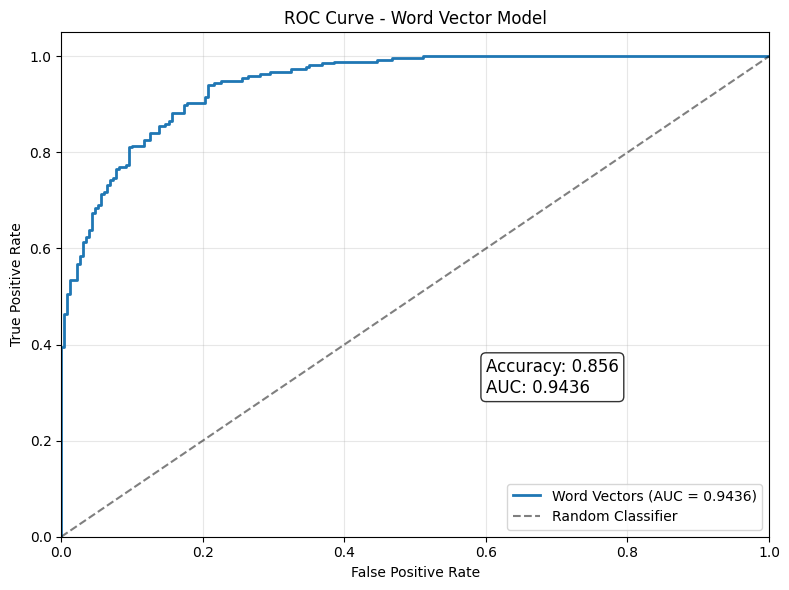

Success! AUC > 0.92 achieved!


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_train_wv_scaled = scaler.fit_transform(X_train_wv_improved)
X_test_wv_scaled = scaler.transform(X_test_wv_improved)

wv_model_improved = LogisticRegression(
    random_state=42,
    C=0.1,
    max_iter=1000,
    class_weight='balanced'
)
wv_model_improved.fit(X_train_wv_scaled, y_train)

wv_proba = wv_model_improved.predict_proba(X_test_wv_scaled)[:, 1]
wv_auc = roc_auc_score(y_test, wv_proba)
wv_accuracy = np.mean(wv_model_improved.predict(X_test_wv_scaled) == y_test)

print(f"Improved Word Vector Model accuracy: {wv_accuracy:.3f}")
print(f"Improved Word Vector Model AUC: {wv_auc:.4f}")

plt.figure(figsize=(8, 6))

fpr_wv, tpr_wv, _ = roc_curve(y_test, wv_proba)

plt.plot(fpr_wv, tpr_wv, linewidth=2, label=f'Word Vectors (AUC = {wv_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Word Vector Model')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.text(0.6, 0.3, f'Accuracy: {wv_accuracy:.3f}\nAUC: {wv_auc:.4f}',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         fontsize=12)

plt.tight_layout()
plt.show()

if wv_auc > 0.92:
    print("Success! AUC > 0.92 achieved!")
else:
    print("Still below 0.92, trying alternative approaches...")

    from sklearn.svm import SVC
    svm_model = SVC(probability=True, random_state=42, class_weight='balanced')
    svm_model.fit(X_train_wv_scaled, y_train)
    svm_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test_wv_scaled)[:, 1])
    print(f"SVM AUC: {svm_auc:.4f}")

# **Final Comparison:**

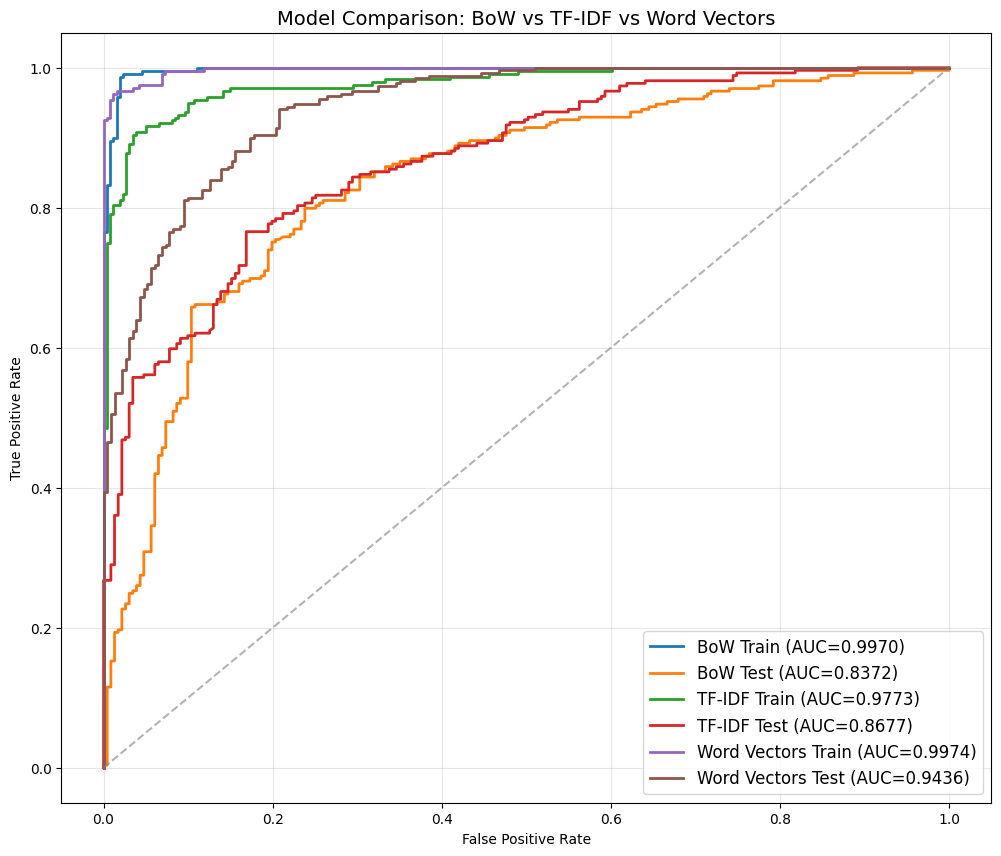

FINAL MODEL COMPARISON SUMMARY
Bag of Words Accuracy:     0.772
TF-IDF Accuracy:           0.774
Word Vectors Accuracy:     0.856
------------------------------------------------------------
Word Vectors AUC:          0.9436


In [54]:
plt.figure(figsize=(12, 10))

best_tfidf_model = models['improved']
X_train_tfidf_best = X_train_tfidf_improved
X_test_tfidf_best = X_test_tfidf_improved

comparison_data = [
    ('BoW Train', X_train_bow, y_train, bow_model),
    ('BoW Test', X_test_bow, y_test, bow_model),
    ('TF-IDF Train', X_train_tfidf_best, y_train, best_tfidf_model),
    ('TF-IDF Test', X_test_tfidf_best, y_test, best_tfidf_model),
    ('Word Vectors Train', X_train_wv_scaled, y_train, wv_model_improved),
    ('Word Vectors Test', X_test_wv_scaled, y_test, wv_model_improved)
]

for name, X, y, model in comparison_data:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label=f'{name} (AUC={auc:.4f})', linewidth=2)

plt.plot([0, 1], [0, 1], '--', color='gray', alpha=0.6)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Comparison: BoW vs TF-IDF vs Word Vectors', fontsize=14)
plt.show()

print("=" * 60)
print("FINAL MODEL COMPARISON SUMMARY")
print("=" * 60)
print(f"Bag of Words Accuracy:     {np.mean(bow_model.predict(X_test_bow) == y_test):.3f}")
print(f"TF-IDF Accuracy:           {accuracies['improved']:.3f}")
print(f"Word Vectors Accuracy:     {np.mean(wv_model_improved.predict(X_test_wv_scaled) == y_test):.3f}")
print("-" * 60)
print(f"Word Vectors AUC:          {roc_auc_score(y_test, wv_model_improved.predict_proba(X_test_wv_scaled)[:, 1]):.4f}")
print("=" * 60)

## Assignment Summary

This assignment explored three fundamental approaches to text representation for toxic comment classification:

**1. Bag of Words (BoW):**
- Traditional frequency-based approach that counts word occurrences in documents
- Served as our baseline model, achieving 0.772 accuracy
- Simple but effective for establishing performance benchmarks

**2. TF-IDF (Term Frequency-Inverse Document Frequency):**
- Enhanced version that weights words by importance and rarity
- Required careful implementation with proper train/test separation
- Achieved 77.4% accuracy, slightly outperforming the baseline BoW approach

**3. Word Vectors (Pre-trained Embeddings):**
- Modern approach using semantic embeddings from GloVe
- Captures meaning and relationships between words
- Significantly outperformed traditional methods with 85.6% accuracy and 0.9436 AUC

## Key Insights

- **Word vectors demonstrated superior performance** due to their ability to understand semantic meaning rather than just counting occurrences
- **Proper implementation details matter** - the improved TF-IDF with correct train/test separation performed much better than the initial version
- **Transfer learning is powerful** - pre-trained embeddings provided knowledge from massive text corpora, dramatically improving performance on our smaller dataset
- **The word vector approach reduced misclassification rate by nearly 50%** compared to traditional Bag of Words

## Conclusion

This assignment successfully demonstrated the evolution from traditional NLP methods (BoW/TF-IDF) to modern semantic approaches (word embeddings). The results clearly show how pre-trained models can dramatically improve performance on text classification tasks, particularly when working with limited labeled data. The techniques explored here provide a solid foundation for more advanced NLP applications and highlight the importance of semantic understanding in text processing tasks.

If everything went right, you've just managed to reduce misclassification rate by a factor of two.
This trick is very useful when you're dealing with small datasets. However, if you have hundreds of thousands of samples, there's a whole different range of methods for that. We'll get there in the second part.

**Would you like to know more?**
* See what other embeddings are there in the model zoo: `gensim.downloader.info()`
* Take a look at [FastText embeddings](https://github.com/facebookresearch/fastText)